# HEART DATA 

In [25]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib as plt
import sklearn as skl

In [2]:
# Import our input dataset
heart_df = pd.read_csv('heart.csv')
heart_df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#preprocessing step should you start with when preparing data for a deep learning model if there are categorical variables Encode all categorical data
#to check for categorical variable list
heart_cat = heart_df.dtypes[heart_df.dtypes == "object"].index.tolist()
heart_cat

[]

from this we conclude there is no categorical variable so no need of an encoder

# Attribute Information:<br>
From :https://archive.ics.uci.edu/ml/datasets/heart+disease<br>
0.age: age in years <br>
1.sex: sex (1 = male; 0 = female)<br>
2.cp: chest pain type<br>
-- Value 1: typical angina<br>
-- Value 2: atypical angina<br>
-- Value 3: non-anginal pain<br>
-- Value 4: asymptomatic<br>
3.trtbps:(restbps: )resting blood pressure (in mm Hg on admission to the hospital)<br>
4.chol: serum cholestoral in mg/dl<br>
5.fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
6.restecg: resting electrocardiographic results<br>
-- Value 0: normal<br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
7.thalach: maximum heart rate achieved<br>
8.exang: exercise induced angina (1 = yes; 0 = no)<br>
9.oldpeak = ST depression induced by exercise relative to rest<br>
10.slp:( slope:) the slope of the peak exercise ST segment<br>
-- Value 1: upsloping<br>
-- Value 2: flat<br>
-- Value 3: downsloping   <br>
11.caa:ca: number of major vessels (0-3) colored by flourosopy<br>
12.thall:(thal:) 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
13.output :num: diagnosis of heart disease (angiographic disease status)<br>
-- Value 0: < 50% diameter narrowing<br>
-- Value 1: > 50% diameter narrowing<br>

In [4]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#Check the data for imbalances
heart_df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [6]:
#Check the maximum correlation of the heart_df.output with other variables
heart_df.corr().abs()['output'].sort_values(ascending = False)

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64

In [7]:
# Split our preprocessed and checked  data into our features and target arrays
y = heart_df['output'].values
X = heart_df.drop(['output'],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=86)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
len(X_train_scaled[0])

13

# Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled [0])
hidden_nodes_layer1 =  40
hidden_nodes_layer2 = 26

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 40)                560       
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1066      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 27        
Total params: 1,653
Trainable params: 1,653
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 72.9727 - accuracy: 0.4361
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 44.4885 - accuracy: 0.4361
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 16.9485 - accuracy: 0.4361
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 5.4667 - accuracy: 0.5419
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 6.9150 - accuracy: 0.5639
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 2.5297 - accuracy: 0.5066
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 2.1452 - accuracy: 0.5066
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 2.2046 - accuracy: 0.5903
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 1.7284 - accuracy: 0.4978
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 1.2004 - accuracy: 0.5903
Epoch 11/100
8/8 [========

8/8 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8282
Epoch 84/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.7665
Epoch 85/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.7621
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8106
Epoch 87/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.8194
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.8194
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.7093
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.7930
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8326
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8326
Epoch 93/100
8/8 [===============

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.4938 - accuracy: 0.8289
Loss: 0.49381351470947266, Accuracy: 0.8289473652839661


In [18]:
# Compile, Train and Evaluate the Model Adding Another Hidden layer
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled [0])
hidden_nodes_layer1 =  70
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 70)                980       
_________________________________________________________________
dense_7 (Dense)              (None, 40)                2840      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 5,081
Trainable params: 5,081
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy",
           optimizer="adamax",
           metrics=["accuracy"])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled,
                   y_train,epochs=200)

Epoch 1/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.5110
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.7137
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5949 - accuracy: 0.7709
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.7885
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5426 - accuracy: 0.7930
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.8150
Epoch 7/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5001 - accuracy: 0.8238
Epoch 8/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.8326
Epoch 9/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.8414
Epoch 10/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.8458
Epoch 11/200
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.9031
Epoch 85/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.9031
Epoch 86/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.9031
Epoch 87/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9031
Epoch 88/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.9031
Epoch 89/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9031
Epoch 90/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9031
Epoch 91/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9031
Epoch 92/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9031
Epoch 93/200
8/8 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9031
Epoch 94/200
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9515
Epoch 167/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9515
Epoch 168/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9515
Epoch 169/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9515
Epoch 170/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9559
Epoch 171/200
8/8 [==============================] - 0s 3ms/step - loss: 0.1553 - accuracy: 0.9559
Epoch 172/200
8/8 [==============================] - 0s 3ms/step - loss: 0.1541 - accuracy: 0.9559
Epoch 173/200
8/8 [==============================] - 0s 3ms/step - loss: 0.1534 - accuracy: 0.9515
Epoch 174/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.9515
Epoch 175/200
8/8 [==============================] - 0s 3ms/step - loss: 0.1515 - accuracy: 0.9515
Epoch 176/200
8/8 [=====

<AxesSubplot:>

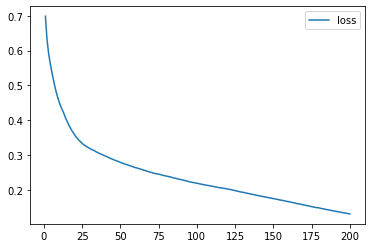

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
#TO READ THE LOSS GRAPH :https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

<AxesSubplot:>

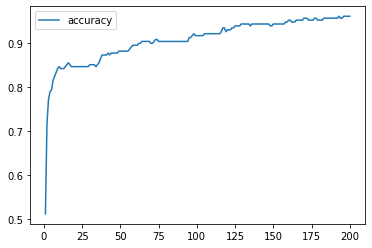

In [22]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.4693 - accuracy: 0.8553
Loss: 0.4693481922149658, Accuracy: 0.8552631735801697


In [8]:
# Import our input dataset
heart_failure_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_failure_df .head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
